# Analysis of the Palmer penguin dataset
*************

The original dataset has been taken from the official Github [page](https://allisonhorst.github.io/palmerpenguins/). 

![pinguins_img](images/palmerpenguins.png)

The data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

## The goal of the analysis

The aim of this project is to analyze the dataset using Python. The objective is to suggest the appropriate types of variables that can effectively analyze the data. By creating a bar chart and a histogram of appropriate variables, the project aims to provide insights into the dataset through visualization.

## Import the dataset and the libraries

In [154]:
# import  libraries

import pandas as pd
import sys
import numpy as np 


In [155]:
# download the data set

data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [156]:
# output the first 3 raws
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Description of the dataset

In [157]:
# information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [158]:
# The data contains some NAN values. 
# I am using the isnull() method to check for the number of these values.

data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [159]:
# Theare are 11 values missed in the "sex" column, and 2 in each of the measurements columns.
# I can calculate the mean of these values to determine if it is sagnificant loss.

display(data.isna().mean()*100)

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [160]:
# Cheking for duplicates:
data.duplicated().sum()

0

Dataset contains 7 columns, 344 rows. 
The "species", "island", and "sex" columns contain the object type variables.
The rest of the columns contain the flot type of variables.
The higer percentage of NaN values is less than 4 % of the data, that might be considered as acceptable. 
Another option are to try to replace the NaN values with the mean of the other columns of to remove the rows which contain NaN values in the most of the columns. 
The are no duplicated rows in the dataset.
I am going to delete the rows which contain NaN values using the dropna() method. The "clean_data" is the dataset with deleted rows.
* ref: https://uchet-jkh.ru/i/kak-udalit-stroku-iz-datafreima-pandas

In [161]:
clean_data = data.dropna() # drop the rows which contain NaN values
clean_data = clean_data.reset_index() # reset the index

del clean_data['index'] # delete the index column

clean_data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [162]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [163]:
clean_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


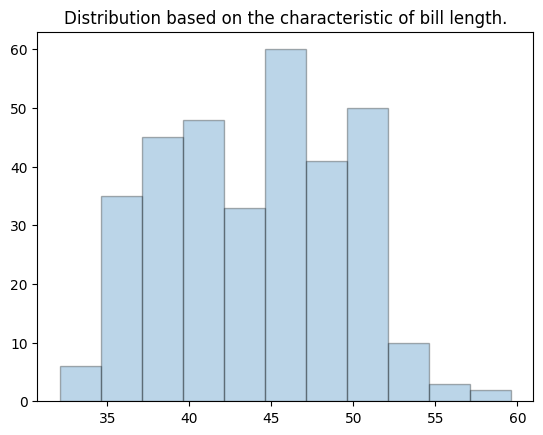

In [164]:
import matplotlib.pyplot as plt

y = np.array(clean_data['bill_length_mm']) 
plt.hist(y, bins= 'auto',edgecolor = "black",alpha = 0.3)
plt.title("Distribution based on the characteristic of bill length.")
plt.show()


***

# End
